Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is
there any point where you can say the image is appropriately reproduced? How would you quantify how
different your photo and the approximation are?

In [4]:
# Import Required Libraries:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

In [5]:
# Loading the face image and convert it to grayscale (optional):
image_url = './punto2/imgs/image18.jpg'
image = io.imread(image_url)
grayscale_image = color.rgb2gray(image)

In [6]:
# Applying SVD and Reconstruct the Image:

# The "np.linalg.svd" function computes the Singular Value Decomposition of the grayscale image and returns three matrices: U, s, and VT. These matrices represent the decomposition.
U, s, VT = np.linalg.svd(grayscale_image, full_matrices=False)
approximations = []

# Loop where we progressively reconstructs the image using an increasing number of singular values. It stores each reconstruction in the approximations list.
for num_singular_values in range(1, len(s) + 1):
    # Reconstruct using a subset of singular values
    reconstructed_image = np.dot(U[:, :num_singular_values], np.dot(
        np.diag(s[:num_singular_values]), VT[:num_singular_values, :]))
    approximations.append(reconstructed_image)


In [7]:
# Now, let's calculate the MSE for each approximation:

# Here, we define original_shape to store the shape of the original grayscale image.
original_shape = grayscale_image.shape
mse_values = []

# Loop, where it calculates the Mean Squared Error (MSE) between the original image and each of the approximations. The MSE quantifies the difference between the original and reconstructed images.
for approx in approximations:
    mse = np.mean((grayscale_image - approx) ** 2)
    mse_values.append(mse)

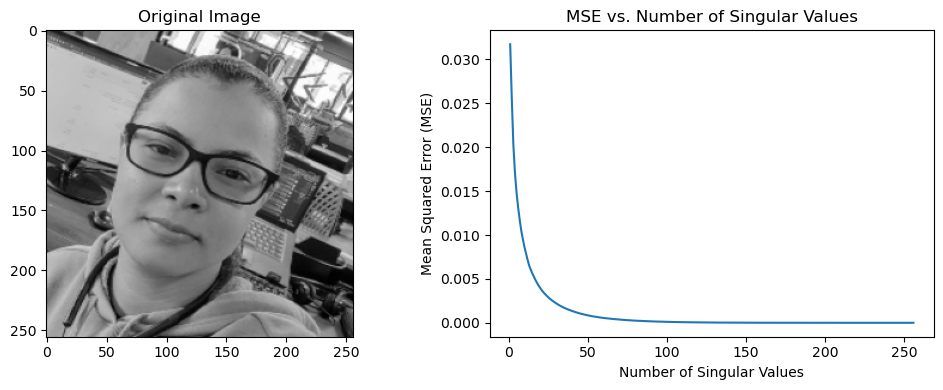

In [8]:
# Now, Plot the Results:


# The resulting plot will show us how the MSE changes as we increase the number of singular values used for reconstruction. We can analyze this plot to determine the point at which the image is "appropriately reproduced," balancing image quality and computational efficiency.

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(s) + 1), mse_values)
plt.xlabel('Number of Singular Values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Singular Values')

plt.tight_layout()
plt.show()


This code build a plot showing the original image and the MSE as a function of the number of singular values used for the reconstruction. We can observe a point where the MSE decreases and eventually levels off, indicating that increasing the number of singular values doesn't significantly improve the image quality. We can choose the number of singular values that corresponds to an appropriate level of reconstruction quality for our specific application (50 in this case).

The lower the MSE, the better the reconstruction quality, but keep in mind that a very low MSE might require a large number of singular values and may not be necessary depending on the use case.

Using 1 Singular Values, MSE: 0.03
Using 6 Singular Values, MSE: 0.01
Using 11 Singular Values, MSE: 0.01
Using 16 Singular Values, MSE: 0.01
Using 21 Singular Values, MSE: 0.00
Using 26 Singular Values, MSE: 0.00
Using 31 Singular Values, MSE: 0.00
Using 36 Singular Values, MSE: 0.00
Using 41 Singular Values, MSE: 0.00
Using 46 Singular Values, MSE: 0.00
Using 51 Singular Values, MSE: 0.00


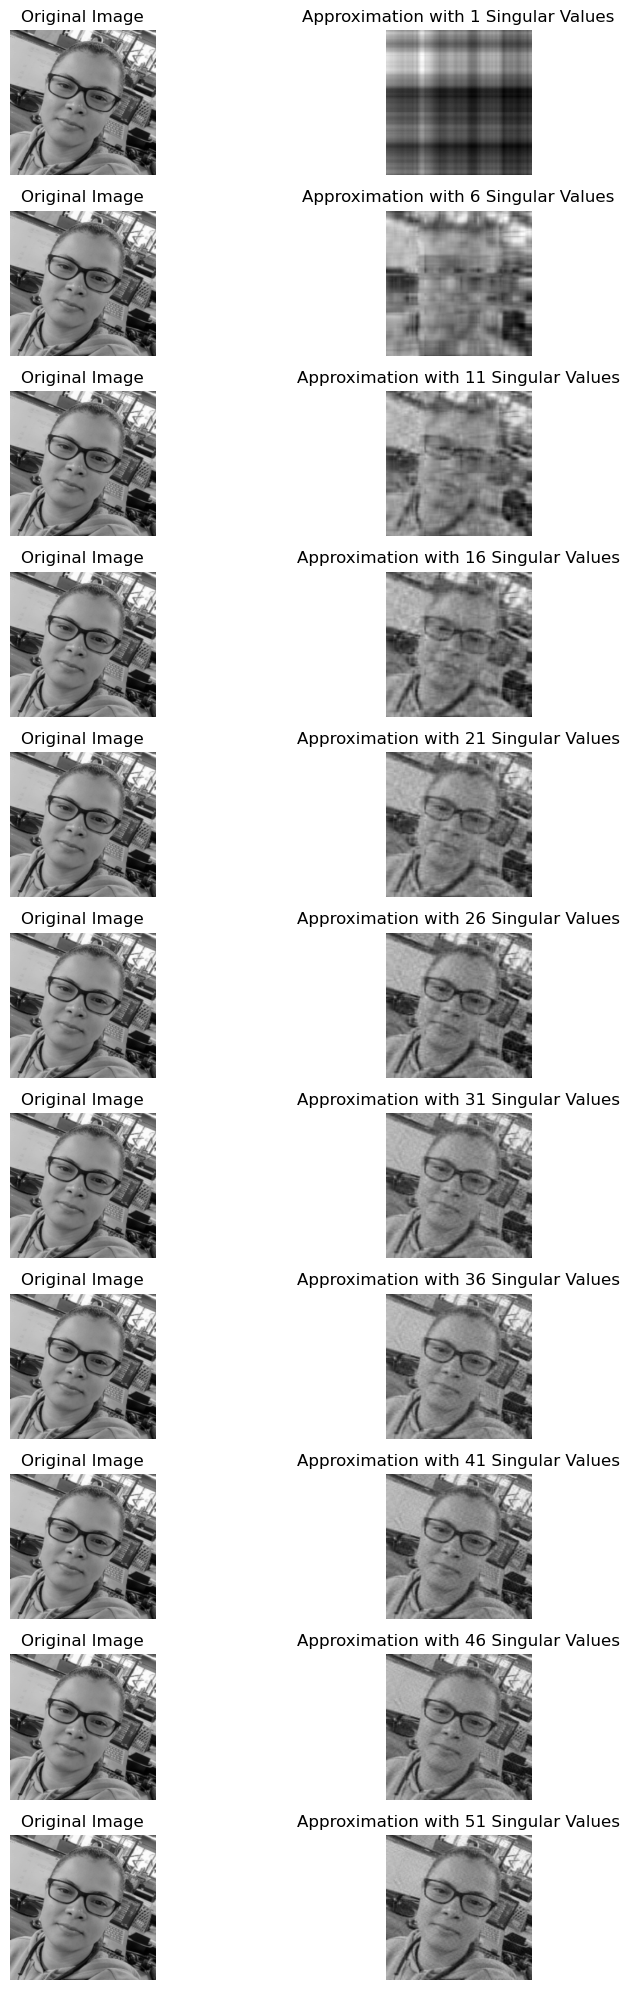

In [14]:
# Create a subplot to display original and approximated images

# Define the singular values you want to use
singular_values = np.arange(1, 55, step=5)

# Create a subplot to display original and approximated images
fig, axes = plt.subplots(len(singular_values), 2, figsize=(10, 20))

for i, num_sv in enumerate(singular_values):
    # Reconstruct the image using a subset of singular values
    approx_image = np.dot(U[:, :num_sv], np.dot(
        np.diag(s[:num_sv]), VT[:num_sv, :]))

    # Display the original grayscale image
    axes[i, 0].imshow(grayscale_image, cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    # Display the approximated image
    axes[i, 1].imshow(approx_image, cmap='gray')
    axes[i, 1].set_title(f'Approximation with {num_sv} Singular Values')
    axes[i, 1].axis('off')

    # Calculate and print the Mean Squared Error (MSE) as a measure of difference
    mse = np.mean((grayscale_image - approx_image) ** 2)
    print(f'Using {num_sv} Singular Values, MSE: {mse:.2f}')

plt.tight_layout()
plt.show()
